In [194]:
import numpy as np
import matplotlib.pyplot as plt
from time import time


# Regular Gradient Descent

In [208]:
def gradient_descent(point, gamma, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    for i in range(n_iter):
        p = p - gamma * gradient(*p)
        points.append(p)
        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Gradient descent converged in {i} steps!")
            return p, points
    return p, points

In [ ]:
def timed_gradient_descent(point, gamma, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    start, now = time(), time()
    while now-start < time_limit:
        p = p - gamma * gradient(*p)
        points.append(p)
        if len(points) >=2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Gradient descent converged in {now - start} seconds!")
            return p, points
        now = time()
    return p, points

# Polyak Gradient Descent

In [ ]:
def polyak_gradient_descent(point, gamma, mu, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    for i in range(n_iter):
        if len(points) > 2:
            p = p - gamma * gradient(*p) + mu * (p - points[-2])
        else:
            p = p - gamma * gradient(*p)

        points.append(p)

        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Polyak gradient descent converged in {i} seconds!")
            return p, points
    return p, points

In [224]:
def timed_polyak_gradient_descent(point, gamma, mu, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    start, now = time(), time()
    while now-start < time_limit:
        if len(points) > 2:
            p = p - gamma * gradient(*p) + mu * (p - points[-2])
        else:
            p = p - gamma * gradient(*p)

        points.append(p)

        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Polyak gradient descent converged in {now - start} steps!")
            return p, points
        now = time()
    return p, points

# Nesterov Gradient Descent

In [210]:
def nesterov_gradient_descent(point, gamma, mu, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    for i in range(n_iter):
        if len(points) > 2:
            p = p - gamma * gradient(*(p + mu * (p - points[-2]))) + mu * (p - points[-2])
        else:
            p = p - gamma * gradient(*p)
        
        points.append(p)
        
        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Nesterov gradient descent converged in {i} steps!")
            return p, points
    return p, points

In [225]:
def timed_nesterov_gradient_descent(point, gamma, mu, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    start, now = time(), time()
    while now-start < time_limit:
        if len(points) > 2:
            p = p - gamma * gradient(*(p + mu * (p - points[-2]))) + mu * (p - points[-2])
        else:
            p = p - gamma * gradient(*p)
        
        points.append(p)
        
        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Nesterov gradient descent converged in {now - start} seconds!")
            return p, points
        now = time()
    return p, points

# AdaGrad

In [ ]:
def adaGrad(point, gamma, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    gradients = np.zeros((n_iter, point.shape[0]))
    for i in range(n_iter):
        grad = gradient(*p)
        squared_gradient = np.square(grad)
        gradients[i] = squared_gradient
        d = np.sum(gradients, axis=0)
        sqrt_d = np.sqrt(d)
        div_sqrd_d = 1/(sqrt_d + 1e-7)
        D = np.diag(div_sqrd_d)
        p = p - gamma * (D @ grad)
        points.append(p)

        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"AdaGrad converged in {i} steps!")
            return p, points
    return p, points

In [231]:
def timed_adaGrad(point, gamma, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    gradients = np.zeros(point.shape[0])
    start, now = time(), time()
    while now-start < time_limit:
        grad = gradient(*p)
        squared_gradient = np.square(grad)
        gradients += squared_gradient
        sqrt_d = np.sqrt(gradients)
        div_sqrd_d = 1/(sqrt_d + 1e-7)
        D = np.diag(div_sqrd_d)
        p = p - gamma * (D @ grad)
        points.append(p)

        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"AdaGrad converged in {now-start} seconds!")
            return p, points
        now = time()
    return p, points

# Newton method

In [ ]:
def newton_method(point, gradient, hessian, n_iter=1, epsilon=0.001):
    p = point
    points = []
    for i in range(n_iter):
        p = p - np.linalg.inv(hessian(*p)) @ gradient(*p)

        points.append(p)
        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Newton method converged in {i} steps!")
            return p, points
    return p, points

In [234]:
def timed_newton_method(point, gradient, hessian, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    start, now = time(), time()
    while now-start < time_limit:
        p = p - np.linalg.inv(hessian(*p)) @ gradient(*p)

        points.append(p)
        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"Newton method converged in {now - start} seconds!")
            return p, points
    return p, points

# BFGS

In [214]:
def BFGS(point, gradient, n_iter=1, epsilon=0.001):
    p = point
    points = []
    points.append(p)
    H_approx = np.identity(p.shape[0])
    previous_gradient = gradient(*p)
    for i in range(n_iter):
        
        p = p - H_approx @ previous_gradient

        current_gradient = gradient(*p)
        delta_k = p - points[-1]
        gamma_k = current_gradient - previous_gradient

        points.append(p)

        if i != 0 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"BFGS converged in {i} steps!")
            return p, points

        nom1 = (np.outer(delta_k, gamma_k) @ H_approx) + (H_approx @ np.outer(gamma_k, delta_k))
        denom1 = np.inner(delta_k, gamma_k)

        nom2 = np.inner(gamma_k, H_approx@gamma_k)
        denom2 = np.inner(delta_k, gamma_k)

        nom3 = np.outer(delta_k, delta_k)
        denom3 = np.inner(delta_k, gamma_k)

        H_approx = H_approx - (nom1/denom1) + ((1 + (nom2/denom2)) * (nom3/denom3))

        previous_gradient = current_gradient
    return p, points


In [ ]:
def timed_BFGS(point, gradient, time_limit=0.1, epsilon=0.001):
    p = point
    points = []
    points.append(p)
    H_approx = np.identity(p.shape[0])
    previous_gradient = gradient(*p)
    start, now = time(), time()
    while now-start < time_limit:
        
        p = p - H_approx @ previous_gradient

        current_gradient = gradient(*p)
        delta_k = p - points[-1]
        gamma_k = current_gradient - previous_gradient

        points.append(p)

        if len(points) > 2 and np.linalg.norm(p - points[-2]) < epsilon:
            print(f"BFGS converged in {now - start} seconds!")
            return p, points

        nom1 = (np.outer(delta_k, gamma_k) @ H_approx) + (H_approx @ np.outer(gamma_k, delta_k))
        denom1 = np.inner(delta_k, gamma_k)

        nom2 = np.inner(gamma_k, H_approx@gamma_k)
        denom2 = np.inner(delta_k, gamma_k)

        nom3 = np.outer(delta_k, delta_k)
        denom3 = np.inner(delta_k, gamma_k)

        H_approx = H_approx - (nom1/denom1) + ((1 + (nom2/denom2)) * (nom3/denom3))

        previous_gradient = current_gradient
    return p, points

In [46]:
def func(x, y):
    return x**2 + np.e**x + y**2 -x*y

def grad_func(x, y):
    return np.array([2*x + np.e**x - y, 2*y -x])

def hessian_func(x, y):
    return np.array([[2 + np.e**x, -1],
                     [-1, 2]])

In [215]:
print(gradient_descent(np.array([1,1]), 0.1, grad_func, n_iter=100, epsilon=0.001))
print(polyak_gradient_descent(np.array([1,1]), 0.5, 0.1, grad_func, n_iter=100, epsilon=0.001))
print(nesterov_gradient_descent(np.array([1,1]), 0.1, 0.1, grad_func, n_iter=100, epsilon=0.001))
print(adaGrad(np.array([1,1]), 1, grad_func, n_iter=100, epsilon=0.0001))
print(newton_method(np.array([1,1]), grad_func, hessian_func, n_iter=100,epsilon=0.0001))

Gradient descent converged in 39 steps!
(array([-0.42860024, -0.21082297]), [array([0.62817182, 0.9       ]), array([0.40511934, 0.78281718]), array([0.25242905, 0.66676568]), array([0.13990499, 0.55865545]), array([0.05277309, 0.46091486]), array([-0.01710909,  0.37400919]), array([-0.07458999,  0.29749645]), array([-0.12273474,  0.23053816]), array([-0.16358381,  0.17215705]), array([-0.19856087,  0.12136726]), array([-0.22870296,  0.07723772]), array([-0.25479508,  0.03891988]), array([-0.2774516,  0.0056564]), array([-0.29716687, -0.02322004]), array([-0.3143475 , -0.04829272]), array([-0.32933379, -0.07006893]), array([-0.34241421, -0.08898852]), array([-0.35383563, -0.10543224]), array([-0.36381076, -0.11972935]), array([-0.37252381, -0.13216456]), array([-0.38013483, -0.14298403]), array([-0.38678319, -0.15240071]), array([-0.39259046, -0.16059888]), array([-0.39766278, -0.16773815]), array([-0.40209289, -0.1739568 ]), array([-0.40596186, -0.17937473]), array([-0.40934052, -0.18

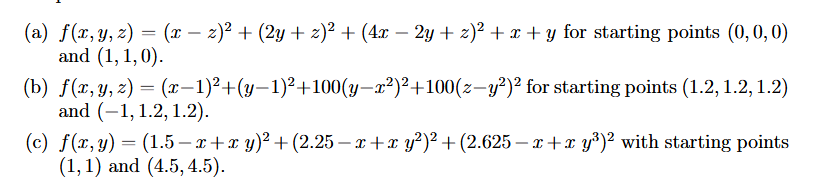

In [183]:
def f1(x, y, z):
    return (x - z) ** 2 + (2*y + z) ** 2 + (4*x -2*y + z) ** 2 + x + y

def grad_f1(x, y, z):
    dx = 34*x - 16*y + 6*z + 1
    dy = -16*x + 16*y + 1
    dz = 6*x + 6*z
    return np.array([dx, dy, dz])

def hessian_f1(x, y, z):
    return np.array([[34, -16, 6],
                [-16, 16, 0],
                [6, 0, 6]])

def f2(x, y, z):
    return ((x - 1) ** 2) + ((y - 1) ** 2) + 100*((y - (x ** 2)) ** 2) + 100*((z - (y ** 2)) ** 2)

def grad_f2(x, y , z):
    dx = 400 * (x ** 3) - 400*x*y +2*x -2
    dy = 400*(y ** 3) - 200*(x ** 2) - 400*z*y + 202*y -2
    dz = 200*z - 200*(y ** 2)
    return np.array([dx, dy, dz])

def hessian_f2(x, y, z):
    return np.array([[1200 * x ** 2 - 400 * y + 2, -400 * x, 0],
              [-400 * x, 1200 * y ** 2 - 400 * z + 202, -400 * y],
              [0, -400 * y, 200]])

def f3(x, y):
    return (1.5 - x + x*y) ** 2 + (2.25 - x + x*(y ** 2)) ** 2 + (2.625 - x + x*(y ** 3)) ** 2

def grad_f3(x, y):
    dx = 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*(y ** 2))*(y ** 2 - 1) + 2*(2.625 - x + x*(y ** 3))*(y ** 3 -1)
    dy = 2*x*(1.5 - x + x*y) + 4*x*y*(2.25 - x + x*(y ** 2)) + 6*x*(y ** 2)*(2.625 - x + x*(y ** 3))
    return np.array([dx, dy])

def hessian_f3(x, y):
    return np.array([[2*(y-1)**2 + 2*(y**2-1)**2 + 2*(y**3-1)**2, 2*(1.5-x+x*y) + 2*x*(y-1) +4*y*(2.25-x+x*y**2) + 4*x*y*(y**2-1) +6*y**2*(2.625-x+x*y**3)+6*x*y**2*(y**3-1)],
                     [2*(1.5-x+x*y) + 2*x*(y-1) +4*y*(2.25-x+x*y**2) + 4*x*y*(y**2-1) +6*y**2*(2.625-x+x*y**3)+6*x*y**2*(y**3-1), 2*x**2+4*x*(2.25-x+x*y**2)+8*x**2*y**2+12*x*y*(2.625-x+x*y**3)+18*x**2*y**4]])

In [190]:
def compare_methods_with_steps(starting_point, function, gradient, hessian, n_iter, epsilon):

    point1, points1 = gradient_descent(starting_point, 0.001, gradient, n_iter, epsilon)
    print(f"Gradient Descent: x = {point1}  |  f(x) = {function(*point1)}")

    point2, points2 = polyak_gradient_descent(starting_point, 0.001, 0.5, gradient, n_iter, epsilon)
    print(f"Polyak Gradient Descent: x = {point2}  |  f(x) = {function(*point2)}")

    point3, points3 = nesterov_gradient_descent(starting_point, 0.001, 0.5, gradient, n_iter, epsilon)
    print(f"Nesterov Gradient Descent: x = {point3}  |  f(x) = {function(*point3)}")

    point4, points4 = adaGrad(starting_point, 1, gradient, n_iter, epsilon)
    print(f"AdaGrad Gradient Descent: x = {point4}  |  f(x) = {function(*point4)}")

    point5, points5 = newton_method(starting_point, gradient, hessian, n_iter)
    print(f"Newton method: x = {point5}  |  f(x) = {function(*point5)}")

    point6, points6 = BFGS(starting_point, gradient, n_iter, epsilon)
    print(f"BFGS: x = {point6}  |  f(x) = {function(*point6)}")


In [201]:
compare_methods_with_steps(np.array([1, 1]), f3, grad_f3, hessian_f3, 10000, 1e-10)

Gradient Descent: x = [2.98213171 0.49550519]  |  f(x) = 5.215290855922319e-05
Polyak Gradient Descent: x = [2.99915098 0.49978801]  |  f(x) = 1.1553092676658564e-07
Nesterov Gradient Descent: x = [2.99914883 0.49978747]  |  f(x) = 1.161171661557816e-07
4797
AdaGrad Gradient Descent: x = [3.  0.5]  |  f(x) = 4.369779070677727e-20
1
Newton method: x = [0. 1.]  |  f(x) = 14.203125


c:\Users\matej\miniconda3\envs\MLDS_P2\lib\site-packages\numpy\core\numeric.py:943: RuntimeWarning: overflow encountered in multiply
  return multiply(a.ravel()[:, newaxis], b.ravel()[newaxis, :], out)
C:\Users\matej\AppData\Local\Temp\ipykernel_27264\3480624397.py:21: RuntimeWarning: invalid value encountered in matmul
  nom1 = (np.outer(delta_k, gamma_k) @ H_approx) + (H_approx @ np.outer(gamma_k, delta_k))
C:\Users\matej\AppData\Local\Temp\ipykernel_27264\3480624397.py:30: RuntimeWarning: invalid value encountered in scalar divide
  H_approx = H_approx - (nom1/denom1) + ((1 + (nom2/denom2)) * (nom3/denom3))


BFGS: x = [nan nan]  |  f(x) = nan


In [237]:
print(timed_BFGS(np.array([1,1]), grad_func, time_limit=5, epsilon=0.001))

BFGS converged in 0.0 steps!
(array([-0.43256266, -0.21628146]), [array([1, 1]), array([-2.71828183,  0.        ]), array([-1.10177989, -1.48920638]), array([0.01467197, 0.19667725]), array([-0.49971444, -0.2254807 ]), array([-0.43591814, -0.22331911]), array([-0.43236867, -0.21581821]), array([-0.43256266, -0.21628146])])
